<a href="https://colab.research.google.com/github/jeftersantiago/ic_redes_complexas/blob/master/NetworkX/Simulacoes_de_redes_complexas_Networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição do notebook

# Simulações
- [X] Resultado de percolação em redes complexas de Erdos-Renyi
- [ ] Reproduzir o resultado sobre o efeito de mundo pequeno de Watts e Strogatz .
- [ ] Reproduzir o resultado de resiliência a ataques aleatórios e direcionados de redes com distribuição
de grau livre de escala de Albert, Jeong e Barabási

## Bibliotecas utilizadas

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import time

## Percolação em redes complexas (Erdos-Renyi)



In [2]:
# numero de nós no grafo
n = 500 
# Lista de probabilidades p de criação de arestas.
p = np.linspace(0, 0.1, n)

# Lista com tamanho dos maiores componentes
largest_cc = []
start_time = time.time()
# Cria grafo de Erdos-Renyi para cada probabilidade p e
# armazena o valor do maior componente na lista.
for i in range(n):
    # Lista de grafos aleatorios com probabilidade p.
    er = nx.gnp_random_graph(n,p[i])
    # Tamanho do maior componente para cada probabilidade.
    largest_cc.append(len(max(nx.connected_components(er), key=len)))

# total_time = time.time() - start_time
# print("For n = ", n)
# print("--- %s seconds ---" % total_time )

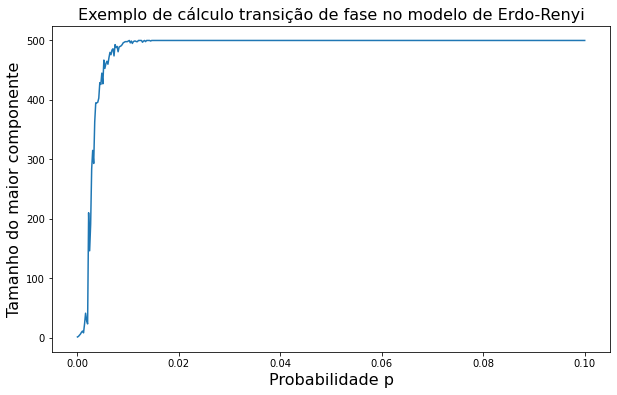

In [3]:
plt.figure(figsize=(10,6))
plt.plot(p, largest_cc)
plt.title("Exemplo de cálculo transição de fase no modelo de Erdo-Renyi", fontsize = 16)
plt.xlabel("Probabilidade p", fontsize = 16)
plt.ylabel("Tamanho do maior componente", fontsize = 16)
plt.show()

## Efeito de mundo pequeno (Strogatz-Watts)

In [4]:
n = 600
k = 6

$$ 
  L_{\text{max}} = \frac{n}{2k} \text{ e } C_{\text{max}} = \frac{3(k-2)}{4(k-1)}
$$

In [5]:
Lmax = n / (2 * k)
Cmax = (3/4) * (k - 2) / (k - 1)

print("Lmax = ", Lmax)
print("Cmax = ", Cmax)

Lmax =  50.0
Cmax =  0.6


In [6]:
vp = np.linspace(0, 1, n * 3, endpoint = True)
print("len(vp) = ", len(vp))

len(vp) =  1800


In [7]:
vL = []
vC = []
i = 0
for p in vp:
  g = nx.watts_strogatz_graph(n, k, p)
  C =  nx.average_clustering(g) / Cmax
  L = nx.average_shortest_path_length(g) / Lmax
  vC.append(C)
  vL.append(L)
  i+=1
#  print("i = ",  i, " -> C/C(0) = ", C, " L/L(0) = ", L)

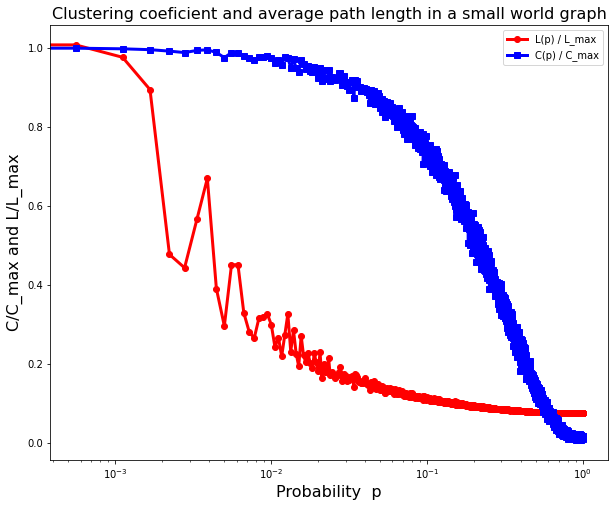

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(vp, vL, '-o', color="red", linewidth=3, label = "L(p) / L_max")
plt.plot(vp, vC, '-s', color="blue", linewidth=3, label = "C(p) / C_max")

plt.title("Clustering coeficient and average path length in a small world graph", fontsize = 16)
plt.xlabel("Probability  p", fontsize = 16)
plt.ylabel("C/C_max and L/L_max", fontsize = 16)


plt.xscale("log")

# plt.xlim([0 1.0])
# plt.ylim([0.0, 1.0])
 
plt.legend()
plt.show()

In [9]:
# '1# pos = nx.circular_layout(g)
# plt.figure(figsize=(25, 25))
# nx.draw_networkx(g, pos = pos,
#                   node_size = 1000, 
#                  font_size = 20, 
#                  node_color = "green", 
#                  font_color="whitesmoke",  
#                  edge_color = "black",
#                  width = 2)
# plt.show()

## Resiliência a ataques aleatórios e direcionados (Albert, Barabási e Jeong)

